In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [2]:
ds = pd.read_csv('ds_salaries.csv', encoding= 'unicode_escape')

In [3]:
ds.shape 

(3755, 12)

In [4]:
ds.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,resident_area
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,NaN
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,NaN
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,NaN
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,NaN
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,NaN
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L,NaN
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L,NaN
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M,NaN
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M,NaN
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M,NaN


In [5]:
ds.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,resident_area
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,NaN
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,NaN
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,NaN
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,NaN
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L,NaN


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           3755 non-null   int64  
 1   experience_level    3755 non-null   object 
 2   employment_type     3755 non-null   object 
 3   job_title           3755 non-null   object 
 4   salary              3755 non-null   int64  
 5   salary_currency     3755 non-null   object 
 6   salary_in_usd       3755 non-null   int64  
 7   employee_residence  3755 non-null   object 
 8   remote_ratio        3755 non-null   int64  
 9   company_location    3755 non-null   object 
 10  company_size        3755 non-null   object 
 11  resident_area       0 non-null      float64
dtypes: float64(1), int64(4), object(7)
memory usage: 352.2+ KB


In [7]:
ds.drop(['salary','resident_area'], axis=1, inplace=True)

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_currency     3755 non-null   object
 5   salary_in_usd       3755 non-null   int64 
 6   employee_residence  3755 non-null   object
 7   remote_ratio        3755 non-null   int64 
 8   company_location    3755 non-null   object
 9   company_size        3755 non-null   object
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [9]:
ds.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
ds.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [11]:
ds['salary_in_usd'].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

# Exploratory Data Analysis

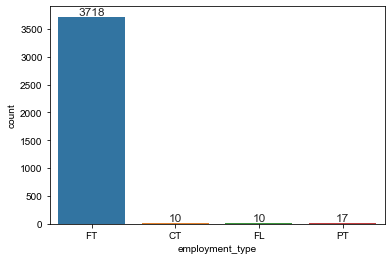

In [12]:
et = sns.countplot(x = 'employment_type', data=ds)
sns.set(rc={'figure.figsize':(15,6)})
for bars in et.containers:
    et.bar_label(bars)

from above graphs, we can conclude that most of the employs are FT 

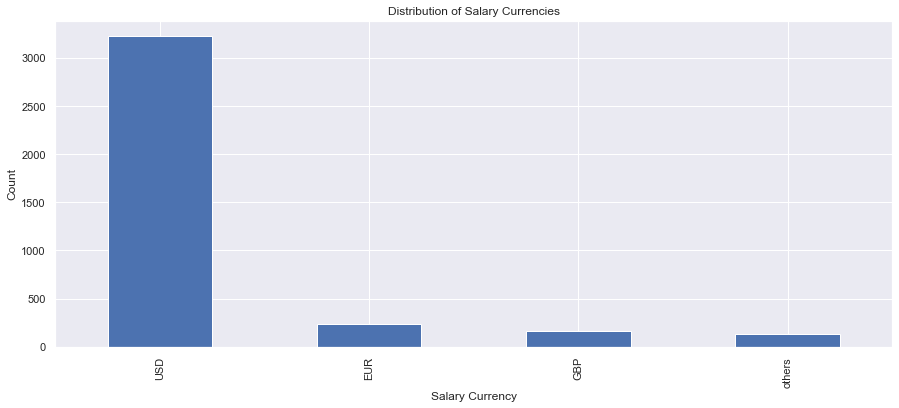

In [13]:
salary= 'salary_currency'
listt=ds[salary].value_counts()
firstt=listt.head(3)
rest=listt.iloc[3:].sum()
firstt['others']=rest
plt.figure(figsize=(15, 6))
firstt.plot(kind='bar')

plt.xlabel('Salary Currency')
plt.ylabel('Count')
plt.title('Distribution of Salary Currencies')

plt.show()

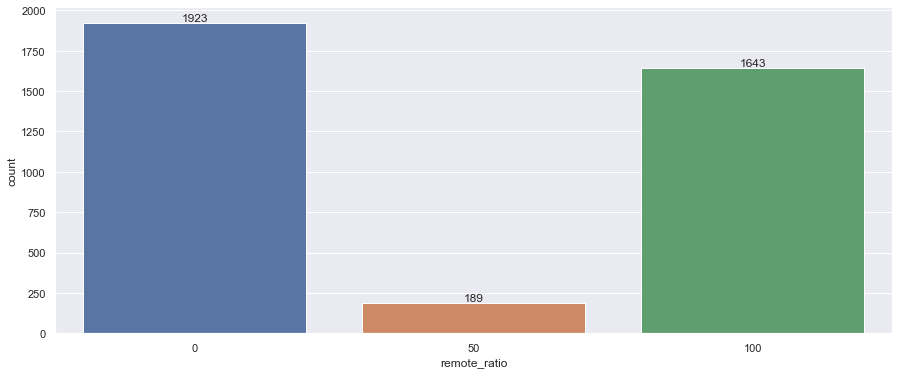

In [14]:
ax = sns.countplot(data=ds, x = 'remote_ratio' )
sns.set(rc={'figure.figsize':(15,6)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

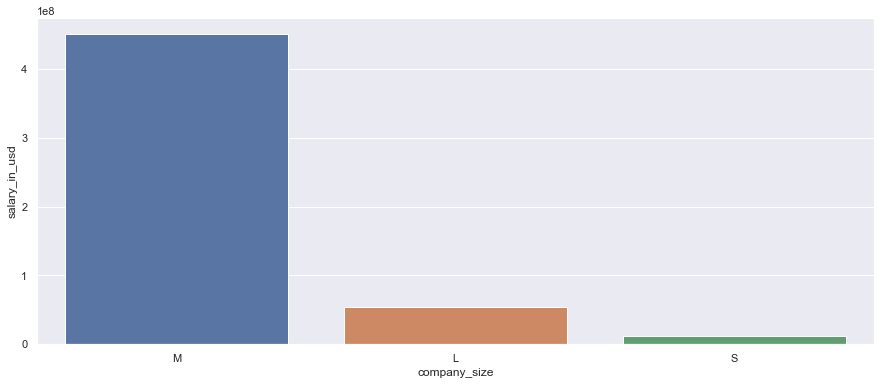

In [15]:
ype_salary = ds.groupby(['company_size'], as_index=False)['salary_in_usd'].sum().sort_values(by='salary_in_usd', ascending=False)
sns.set(rc={'figure.figsize':(15,6)})

sns.barplot(x = 'company_size',y= 'salary_in_usd' ,data = ype_salary)

<AxesSubplot:xlabel='company_location', ylabel='salary_in_usd'>

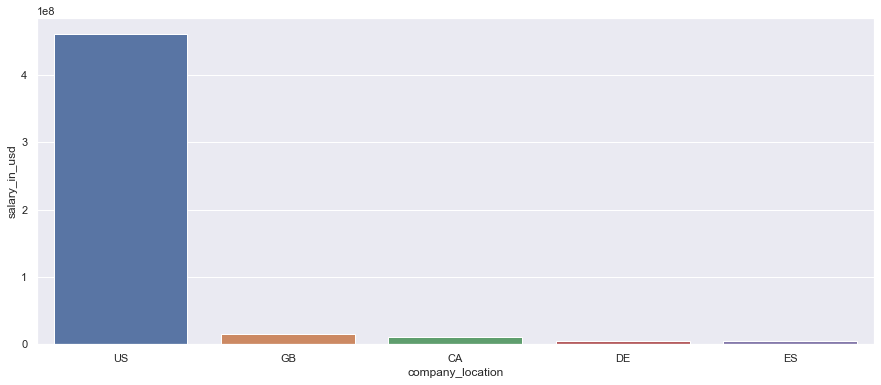

In [16]:
ye_salary = ds.groupby(['company_location'], as_index=False)['salary_in_usd'].sum().sort_values(by='salary_in_usd', ascending=False).head(5)
sns.set(rc={'figure.figsize':(15,6)})

sns.barplot(x = 'company_location',y= 'salary_in_usd' ,data = ye_salary)

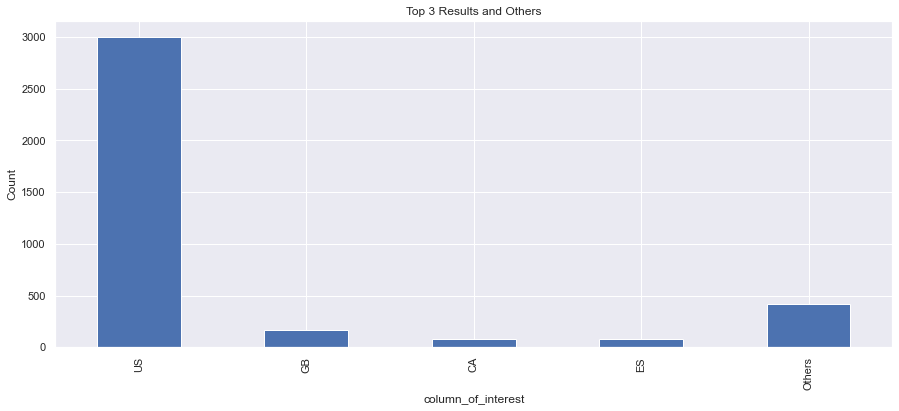

In [17]:
new_list='employee_residence'
employ= ds[new_list].value_counts()
top_results = employ.head(4)
other_count = employ.iloc[4:].sum()
top_results['Others'] = other_count

plt.figure(figsize=(15, 6))
top_results.plot(kind='bar')
plt.xlabel('column_of_interest')
plt.ylabel('Count')
plt.title('Top 3 Results and Others')
plt.show()

Text(0.5, 1.0, 'Distribution of Categories')

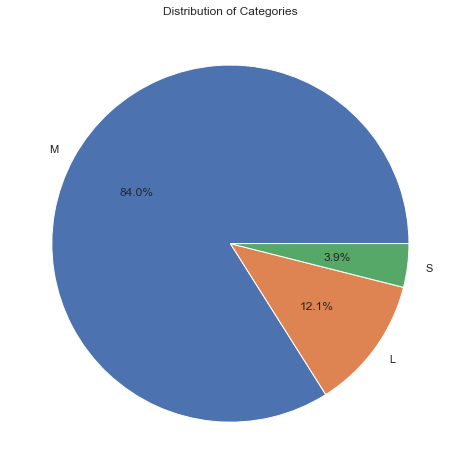

In [18]:
category_column = 'company_size' 
category_counts = ds[category_column].value_counts()
plt.figure(figsize=(8, 11))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Categories')

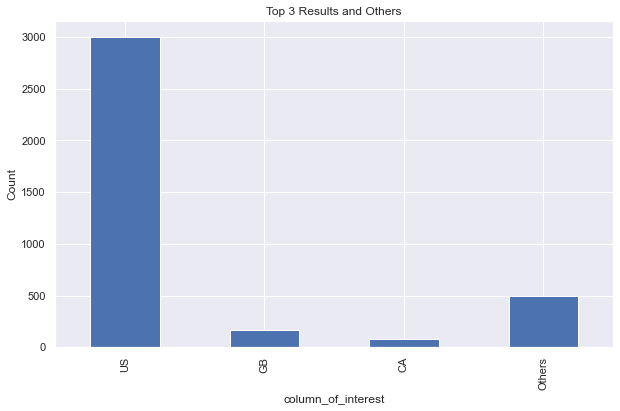

In [19]:
columnnn = 'employee_residence' 
category_counts = ds[columnnn].value_counts()

top_results = category_counts.head(3)
other_count = category_counts.iloc[3:].sum()
top_results['Others'] = other_count

plt.figure(figsize=(10, 6))
top_results.plot(kind='bar')
plt.xlabel('column_of_interest')
plt.ylabel('Count')
plt.title('Top 3 Results and Others')

plt.show()





# Prediction 
using Regression

In [20]:

lr=LinearRegression()


u = pd.get_dummies(ds['job_title'])
w = pd.get_dummies(ds['company_location'])
v = pd.get_dummies(ds['experience_level'])
x = pd.concat([u,v,w], axis=1)

Y = ds['salary_in_usd']
lr.fit(x, Y)
Yhat=lr.predict(x)
# print(lr.predict([[]]))

In [21]:
lr.intercept_

4.9037390416577894e+17

In [22]:
lr.coef_

array([ 1.00968301e+14,  1.00968301e+14,  1.00968301e+14,  1.00968301e+14,
        1.00968301e+14,  1.00968301e+14,  1.00968301e+14,  1.00968301e+14,
        1.00968301e+14,  1.00968301e+14,  1.00968301e+14,  1.00968301e+14,
        1.00968301e+14,  1.00968301e+14,  1.00968301e+14,  1.00968301e+14,
        1.00968301e+14,  1.00968301e+14,  1.00968301e+14,  1.00968301e+14,
        1.00968301e+14,  1.00968301e+14,  1.00968301e+14,  1.00968301e+14,
        1.00968301e+14,  1.00968301e+14,  1.00968301e+14,  1.00968301e+14,
        1.00968301e+14,  1.00968301e+14,  1.00968301e+14,  1.00968301e+14,
        1.00968301e+14,  1.00968301e+14,  1.00968301e+14,  1.00968301e+14,
        1.00968301e+14,  1.00968301e+14,  1.00968301e+14,  1.00968301e+14,
        1.00968301e+14,  1.00968301e+14,  1.00968301e+14,  1.00968301e+14,
        1.00968301e+14,  1.00968301e+14,  1.00968301e+14,  1.00968301e+14,
        1.00968301e+14,  1.00968301e+14,  1.00968301e+14,  1.00968301e+14,
        1.00968301e+14,  

C:\Users\91799\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91799\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

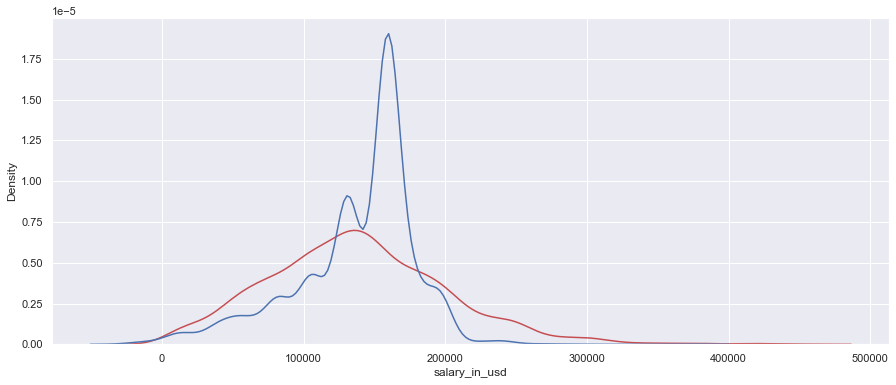

In [23]:
ax1=sns.distplot(ds['salary_in_usd'], hist=False, color="r", label="actual value")

sns.distplot(Yhat, hist=False, color="b", label="fitted value", ax=ax1)